# Preprocessing

In [32]:
import pandas as pd

In [33]:
data = pd.read_csv('GlobalTemperatures.csv', parse_dates=['dt'])

### Wypełnienie brakujących danych średnią wartością

In [34]:
data = data.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [35]:
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
1,1750-02-01,3.083,3.702,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
2,1750-03-01,5.626,3.076,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
3,1750-04-01,8.490,2.451,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
4,1750-05-01,11.573,2.072,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532


#### Sprawdzenie efektów wypełnienia brakujących danych

- wypłenienie brakujących danych przebiegło efektywnie 
- nastąpiły zmiany w wartościach opisu statystycznego danych
- nastąpiły zmiany w histogramach

In [36]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.373064,1.094376,3.404137,0.460672,3.282695,0.352167,1.006406,0.058126
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.327750,0.187000,12.266000,0.206750,0.959500,0.231000,14.765500,0.108000
50%,8.584500,0.394500,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
75%,12.538750,1.413250,16.749000,0.479782,4.669000,0.431849,15.819500,0.131000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null datetime64[ns]
LandAverageTemperature                       3192 non-null float64
LandAverageTemperatureUncertainty            3192 non-null float64
LandMaxTemperature                           3192 non-null float64
LandMaxTemperatureUncertainty                3192 non-null float64
LandMinTemperature                           3192 non-null float64
LandMinTemperatureUncertainty                3192 non-null float64
LandAndOceanAverageTemperature               3192 non-null float64
LandAndOceanAverageTemperatureUncertainty    3192 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 224.6 KB


In [38]:
data.isna().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

### Kodowanie 

W naszym przypadku nie ma danych kategorycznych, dlatego nie ma potrzeby stosowania kodowania ich na dane numeryczne.

### Normalizacja 

Ze względu na to, że wartości cech (z wykluczeniem daty pomiaru) sięgają skali ujemnej, odpowiednim zabiegiem dla naszego zestawu danych będzie normalizacja do przedziału od -1 do 1 celem ujednolicenia wszystkich atrybutów.

In [39]:
def normalize(data):
    normData = 2 * ((data - data.min())/(data.max() - data.min())) - 1
    normData["dt"] = data["dt"]
    return normData

In [40]:
data = normalize(data)
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,-0.515284,-0.097629,0.096057,-0.798669,0.077978,-0.775935,0.06603,-0.582978
1,1750-02-01,-0.510639,-0.065001,0.096057,-0.798669,0.077978,-0.775935,0.06603,-0.582978
2,1750-03-01,-0.269608,-0.224573,0.096057,-0.798669,0.077978,-0.775935,0.06603,-0.582978
3,1750-04-01,0.001848,-0.383890,0.096057,-0.798669,0.077978,-0.775935,0.06603,-0.582978
4,1750-05-01,0.294062,-0.480500,0.096057,-0.798669,0.077978,-0.775935,0.06603,-0.582978


In [41]:
data.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,-0.009077,-0.769445,0.096057,-0.798669,0.077978,-0.775935,0.066030,-0.582978
std,0.414489,0.278964,0.441522,0.212831,0.434162,0.203978,0.391903,0.280126
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.392659,-0.960999,-0.174319,-0.924809,-0.157982,-0.892268,-0.108061,-0.681928
50%,0.010805,-0.908106,0.096057,-0.798669,0.077978,-0.775935,0.066030,-0.582978
75%,0.385598,-0.648420,0.407134,-0.798669,0.332628,-0.775935,0.302375,-0.571084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Analiza danych po wstępnym przetworzeniu danych

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103b62f90>,
      dtype=object)

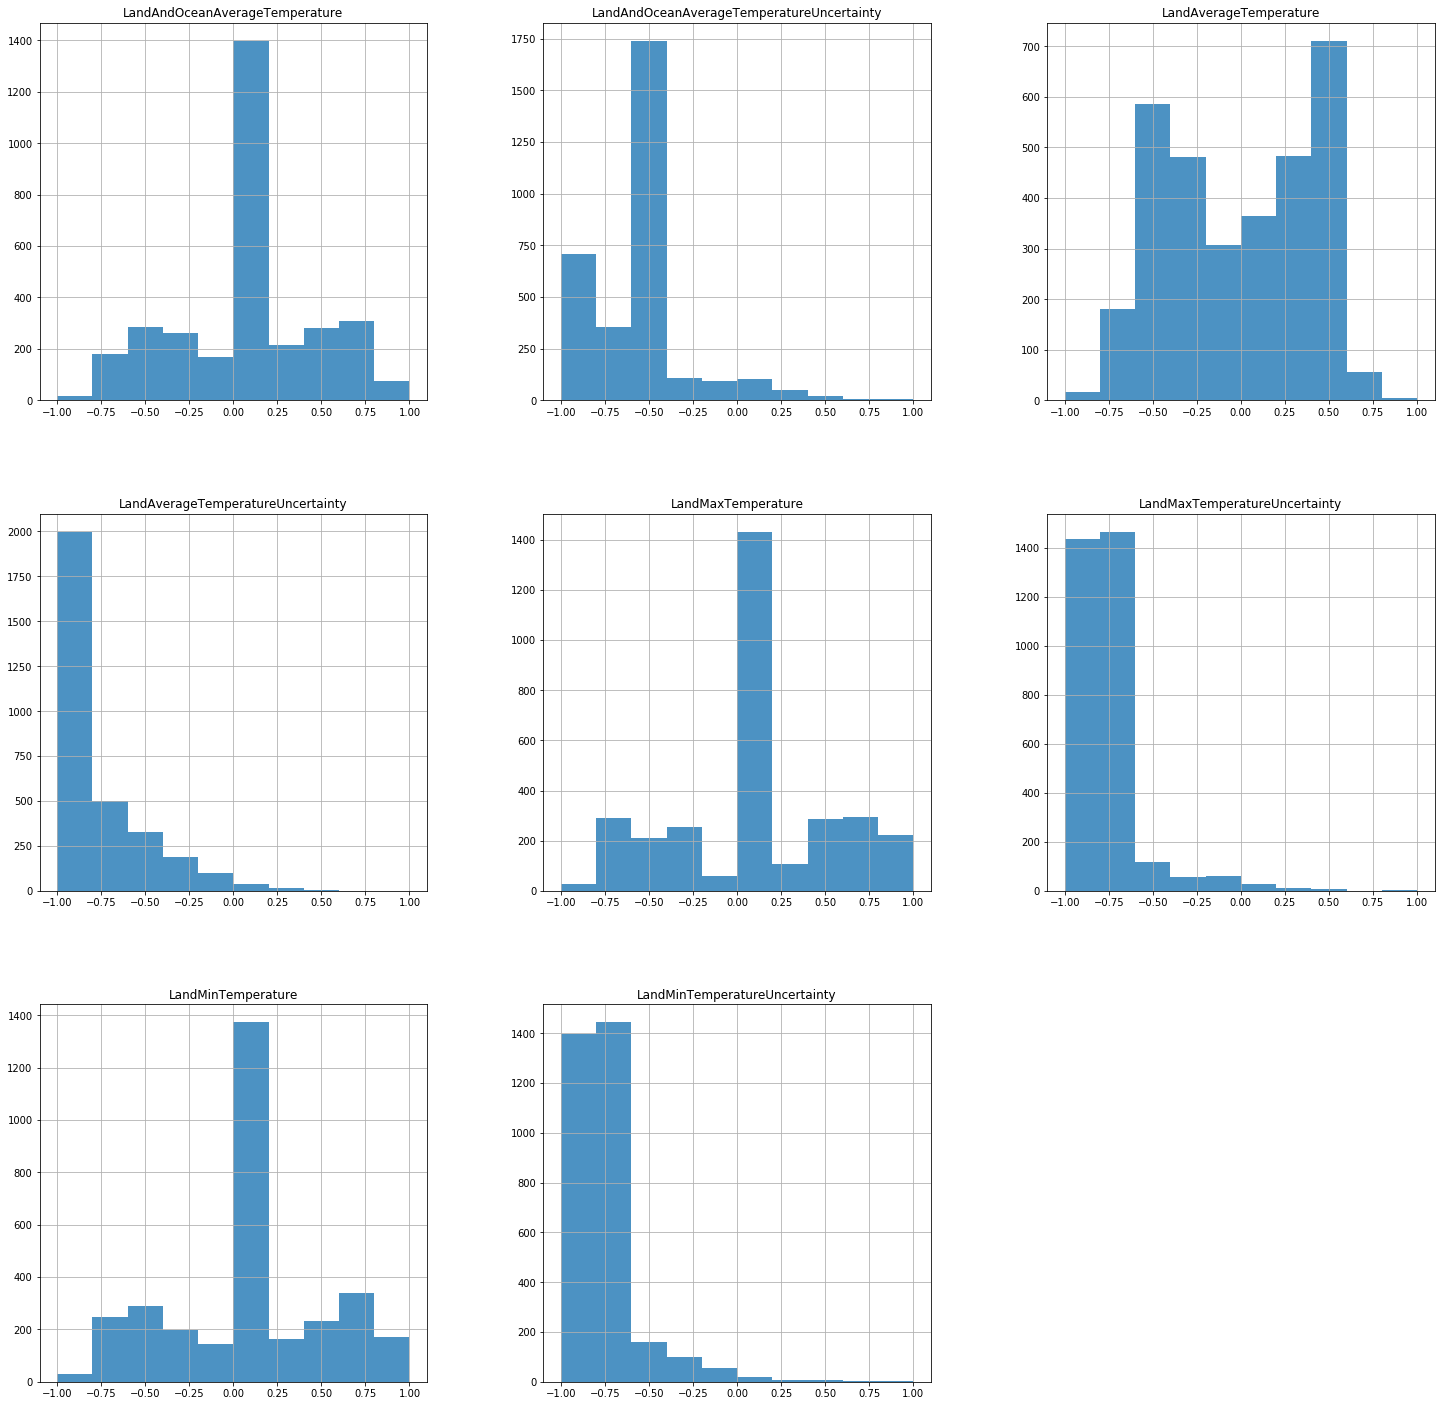

In [42]:
data.hist(figsize = (25, 25), alpha = 0.8)

In [ ]:
# pip install ipynb
from ipynb.fs.full.analysis import makeThreePlot

In [ ]:
tempByYear = data.groupby(data.dt.dt.year).mean()

In [ ]:
makeThreePlot(tempByYear, 'Land temperature between 1750 and 2015', 'year')

In [ ]:
tempByMonth = data.groupby(data.dt.dt.month).mean()

In [ ]:
makeThreePlot(filledTempByMonth, 'Land temperature per month', 'month')